In [4]:
import json
import numpy
from minisom import MiniSom
import matplotlib.pyplot as plt

In [5]:
with open("../app/data/suburb_regions.json") as file:
    regions = json.load(file)

In [21]:
# The features we want to treat as standard
feature_names = [
    'rental_rate',
    'median_rent',
    'income',
    'religious',
    'population',
    'unemployment',
]

rows_and_columns = []
for region in regions:
    features = [region[feature] for feature in feature_names]
    for zone_type in "RCIWP":
        features.append(region['zoning'][zone_type])
    rows_and_columns.append(features)

In [22]:
numpy_vn = numpy.array(rows_and_columns)
print(numpy_vn.sum(axis=0))
numpy_vn /= numpy_vn.sum(axis=0)

[1.75737120e+02 3.04404448e+05 1.23669645e+06 4.79486957e+02
 2.29390100e+06 1.61616659e+01 3.35020527e+06 2.59328397e+05
 4.79121435e+04 7.28746693e+04 1.54229751e+06]


In [8]:
som = MiniSom(25, 25, numpy_vn.shape[1], sigma=1, learning_rate=1)

In [9]:
som.train_random(numpy_vn, 200000)

In [10]:
winners = numpy.array([som.winner(thing) for thing in numpy_vn])

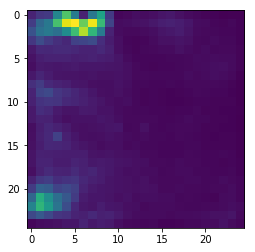

In [11]:
plt.imshow(som.distance_map())

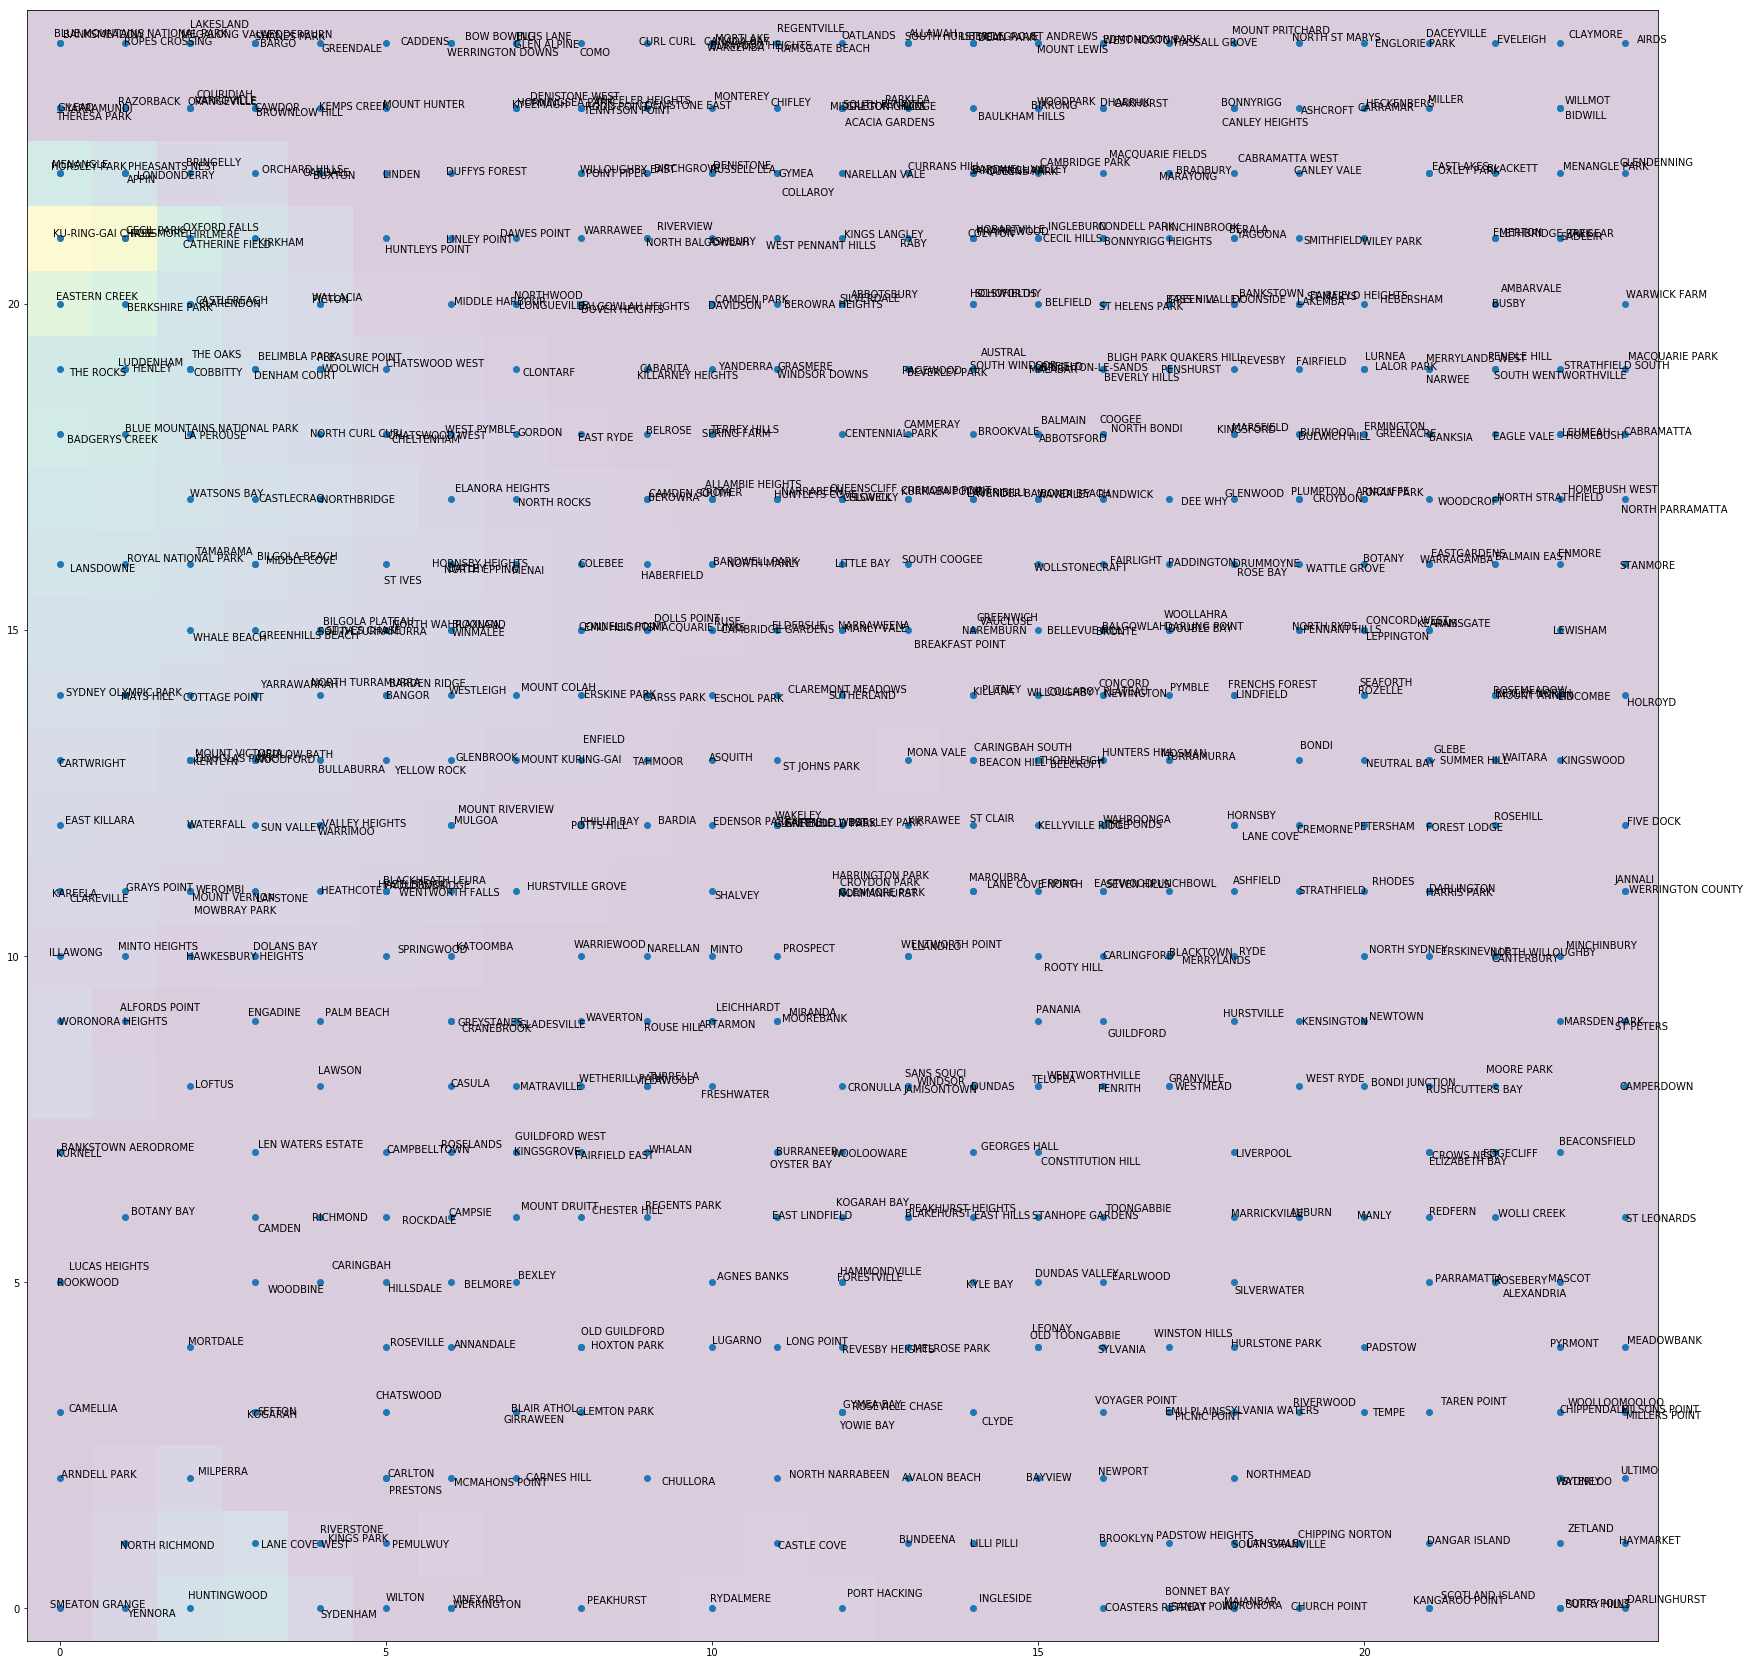

In [12]:
plt.figure(figsize=(30, 30))
plt.imshow(som.get_weights()[:,:,9], origin="lower", alpha=.2)

for region, winner in zip(regions, winners):
    winner = winner + numpy.random.normal(size=2, scale=(.1))
    plt.text(winner[0], winner[1], region['name'])
plt.scatter(winners[:,0], winners[:,1])

In [130]:
leichhardt = [region for region in regions if region['name'] == 'LILYFIELD'][0]
putney = [region for region in regions if region['name'] == 'CONDELL PARK'][0]
# leichhardt, putney


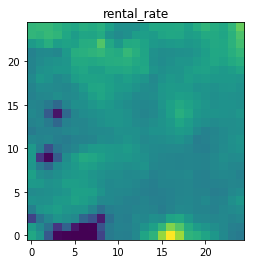

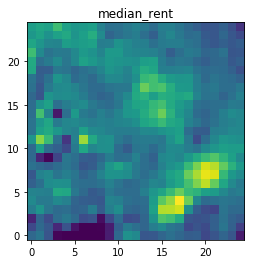

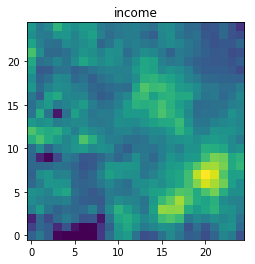

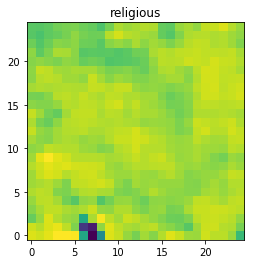

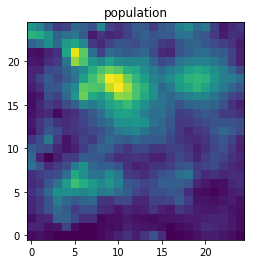

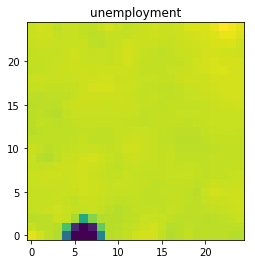

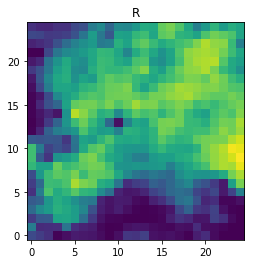

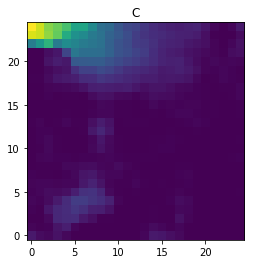

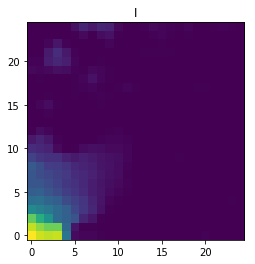

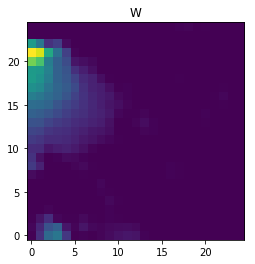

In [13]:
names = feature_names + list("RCIWP")
for i in range(10):
    plt.imshow(som.get_weights()[:,:,i], origin="lower")
    plt.title(names[i])
    plt.show()
    

In [23]:
id_to_winner = {region['id']: list([int(f) for f in winner]) for region, winner in zip(regions, winners)}

In [24]:
with open("../app/data/id-to-winner-som.json", 'w') as file:
    json.dump(id_to_winner, file)

In [25]:
som.get_weights().shape

(25, 25, 11)

In [20]:
numpy.savetxt('../app/data/som_weights.txt', som.get_weights().reshape(-1, 11))

In [ ]:
som.